In [15]:
# Librerías y setup del entorno para que `src` sea importable
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
# Asegurar que el repo raíz esté en sys.path y detectar la raíz del repo desde notebooks/
sys.path.insert(0, str(Path('.').resolve()))
cwd = Path('.').resolve()
ROOT = cwd
# buscar dataset en cwd o en directorios ascendentes (hasta 3 niveles)
for p in [cwd, cwd.parent, cwd.parent.parent, cwd.parent.parent.parent]:
    if (p / 'dataset_alquiler.csv').exists():
        ROOT = p
        break
DATA_PATH = ROOT / 'dataset_alquiler.csv'
FIGS_DIR = ROOT / 'reports' / 'figs'
FIGS_DIR.mkdir(parents=True, exist_ok=True)
print('DETECTED ROOT ->', ROOT)
print('DATA_PATH ->', DATA_PATH)
print('FIGS_DIR ->', FIGS_DIR)

DETECTED ROOT -> /workspaces/dataIATry
DATA_PATH -> /workspaces/dataIATry/dataset_alquiler.csv
FIGS_DIR -> /workspaces/dataIATry/reports/figs


In [16]:
# Cargar una muestra rápida del dataset
if DATA_PATH.exists():
    df = pd.read_csv(DATA_PATH, low_memory=False)
    display(df.head())
    print('Shape:', df.shape)
else:
    print('No se encontró el dataset en', DATA_PATH)

,indice,fecha,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,u_casuales,u_registrados,total_alquileres
0,1,2011-01-01,1,0,1,0.0,0,6.0,0,1,0.24,0.2879,0.81,0.0,3,13,16.0
1,2,2011-01-01,1,0,1,1.0,0,6.0,0,1,0.22,0.2727,0.80,0.0,8,32,40.0
2,3,2011-01-01,1,0,1,2.0,0,6.0,0,1,0.22,0.2727,0.80,0.0,5,27,32.0
3,4,2011-01-01,1,0,1,3.0,0,6.0,0,1,0.24,0.2879,0.75,0.0,3,10,13.0
4,5,2011-01-01,1,0,1,4.0,0,NaN,0,1,0.24,0.2879,0.75,0.0,0,1,1.0


Shape: (17379, 17)


In [17]:
# Resumen del dataset: estructura y valores faltantes
if 'df' in globals():
    display(df.head())
    print('Shape:', df.shape)
    print('\nTipos de columnas:' )
    print(df.dtypes)
    display(df.describe(include='all').T)
    miss = df.isnull().sum()
    miss = miss[miss > 0].sort_values(ascending=False)
    if len(miss):
        print('\nValores faltantes por columna:' )
        display(miss)
    else:
        print('\nNo se detectaron valores faltantes relevantes')
else:
    print('Carga el dataset antes de ejecutar esta celda')

,indice,fecha,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,u_casuales,u_registrados,total_alquileres
0,1,2011-01-01,1,0,1,0.0,0,6.0,0,1,0.24,0.2879,0.81,0.0,3,13,16.0
1,2,2011-01-01,1,0,1,1.0,0,6.0,0,1,0.22,0.2727,0.80,0.0,8,32,40.0
2,3,2011-01-01,1,0,1,2.0,0,6.0,0,1,0.22,0.2727,0.80,0.0,5,27,32.0
3,4,2011-01-01,1,0,1,3.0,0,6.0,0,1,0.24,0.2879,0.75,0.0,3,10,13.0
4,5,2011-01-01,1,0,1,4.0,0,NaN,0,1,0.24,0.2879,0.75,0.0,0,1,1.0


Shape: (17379, 17)

Tipos de columnas:
indice                 int64
fecha                 object
temporada              int64
anio                   int64
mes                    int64
hora                 float64
feriado                int64
dia_semana           float64
dia_trabajo            int64
clima                  int64
temperatura          float64
sensacion_termica    float64
humedad              float64
velocidad_viento     float64
u_casuales             int64
u_registrados          int64
total_alquileres     float64
dtype: object


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
indice,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
fecha,17379,731,2012-12-31,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temporada,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
anio,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mes,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hora,17369.0,NaN,NaN,NaN,11.546779,6.915469,0.0,6.0,12.0,18.0,23.0
feriado,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
dia_semana,17369.0,NaN,NaN,NaN,3.002533,2.005633,0.0,1.0,3.0,5.0,6.0
dia_trabajo,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
clima,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0



Valores faltantes por columna:


hora                10
dia_semana          10
total_alquileres    10
dtype: int64

## Resumen del dataset
A continuación se muestran estructura, tipos, estadísticos y valores faltantes para entender rápidamente la calidad de los datos.

In [18]:
# Resumen del dataset: estructura y valores faltantes
if 'df' in globals():
    display(df.head())
    print('Shape:', df.shape)
    print('\nTipos de columnas:' )
    print(df.dtypes)
    display(df.describe(include='all').T)
    miss = df.isnull().sum()
    miss = miss[miss > 0].sort_values(ascending=False)
    if len(miss):
        print('\nValores faltantes por columna:' )
        display(miss)
    else:
        print('\nNo se detectaron valores faltantes relevantes')
else:
    print('Carga el dataset antes de ejecutar esta celda')

,indice,fecha,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,u_casuales,u_registrados,total_alquileres
0,1,2011-01-01,1,0,1,0.0,0,6.0,0,1,0.24,0.2879,0.81,0.0,3,13,16.0
1,2,2011-01-01,1,0,1,1.0,0,6.0,0,1,0.22,0.2727,0.80,0.0,8,32,40.0
2,3,2011-01-01,1,0,1,2.0,0,6.0,0,1,0.22,0.2727,0.80,0.0,5,27,32.0
3,4,2011-01-01,1,0,1,3.0,0,6.0,0,1,0.24,0.2879,0.75,0.0,3,10,13.0
4,5,2011-01-01,1,0,1,4.0,0,NaN,0,1,0.24,0.2879,0.75,0.0,0,1,1.0


Shape: (17379, 17)

Tipos de columnas:
indice                 int64
fecha                 object
temporada              int64
anio                   int64
mes                    int64
hora                 float64
feriado                int64
dia_semana           float64
dia_trabajo            int64
clima                  int64
temperatura          float64
sensacion_termica    float64
humedad              float64
velocidad_viento     float64
u_casuales             int64
u_registrados          int64
total_alquileres     float64
dtype: object


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
indice,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
fecha,17379,731,2012-12-31,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temporada,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
anio,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mes,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hora,17369.0,NaN,NaN,NaN,11.546779,6.915469,0.0,6.0,12.0,18.0,23.0
feriado,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
dia_semana,17369.0,NaN,NaN,NaN,3.002533,2.005633,0.0,1.0,3.0,5.0,6.0
dia_trabajo,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
clima,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0



Valores faltantes por columna:


hora                10
dia_semana          10
total_alquileres    10
dtype: int64

## Serie temporal — `total_alquileres`
Visualización de la serie ordenada por fecha para detectar tendencias, estacionalidad y outliers temporales.

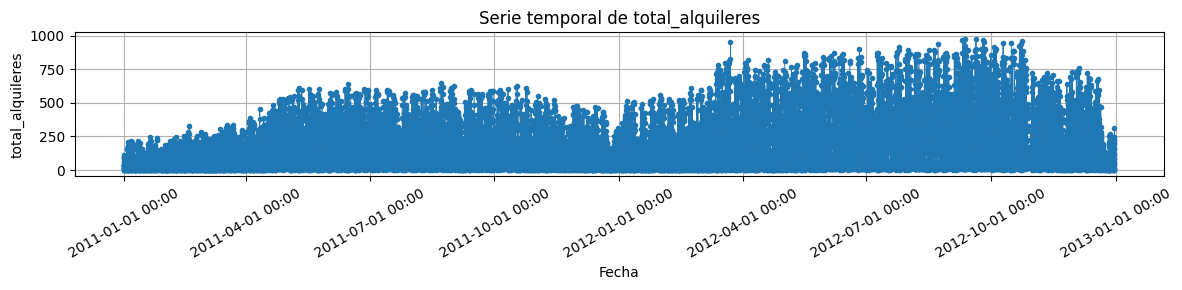

In [19]:
# Serie temporal de `total_alquileres`
import matplotlib.dates as mdates
if 'df_feat' in globals():
    ts = df_feat.copy()
    if 'fecha' in ts.columns:
        ts['fecha'] = pd.to_datetime(ts['fecha'])
        ts = ts.sort_values('fecha')
        plt.figure(figsize=(12,3))
        plt.plot(ts['fecha'], ts['total_alquileres'], marker='.', linewidth=0.6)
        plt.xlabel('Fecha')
        plt.ylabel('total_alquileres')
        plt.title('Serie temporal de total_alquileres')
        plt.grid(True)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()
    else:
        print('df_feat no contiene columna `fecha`. Ejecuta la celda del pipeline.')
else:
    print('Genera df_feat con la celda de pipeline antes de ejecutar esta celda')

## Distribución por hora y boxplot
Promedio y dispersión de `total_alquileres` por hora del día.

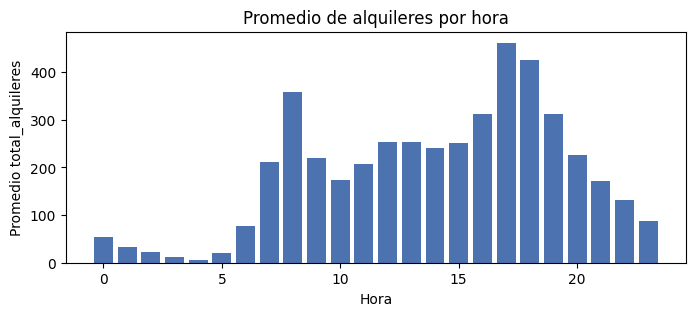

<Figure size 1200x400 with 0 Axes>

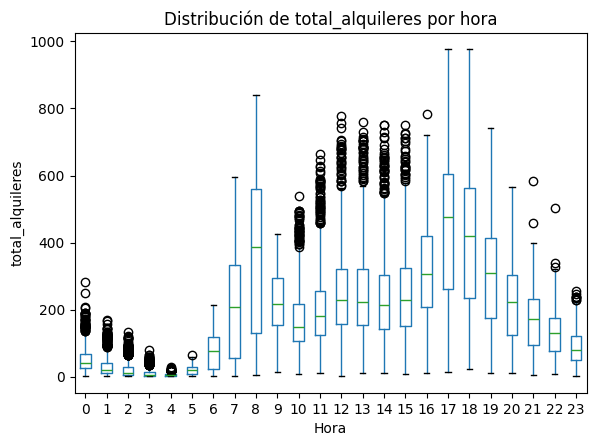

In [20]:
# Promedio por hora (barras) y boxplot por hora
if 'df_feat' in globals() and 'hora' in df_feat.columns:
    agg = df_feat.groupby('hora')['total_alquileres'].agg(['mean','median','count']).reset_index()
    plt.figure(figsize=(8,3))
    plt.bar(agg['hora'], agg['mean'], color='#4C72B0')
    plt.xlabel('Hora')
    plt.ylabel('Promedio total_alquileres')
    plt.title('Promedio de alquileres por hora')
    plt.show()
    # Boxplot por hora
    plt.figure(figsize=(12,4))
    df_feat.boxplot(column='total_alquileres', by='hora', grid=False)
    plt.title('Distribución de total_alquileres por hora')
    plt.suptitle('')
    plt.xlabel('Hora')
    plt.ylabel('total_alquileres')
    plt.show()
else:
    print('Genera df_feat con la celda de pipeline para ver promedio y boxplot por hora')

## Correlación entre features numéricas
Matriz de correlación para identificar relaciones fuertes entre variables numéricas.

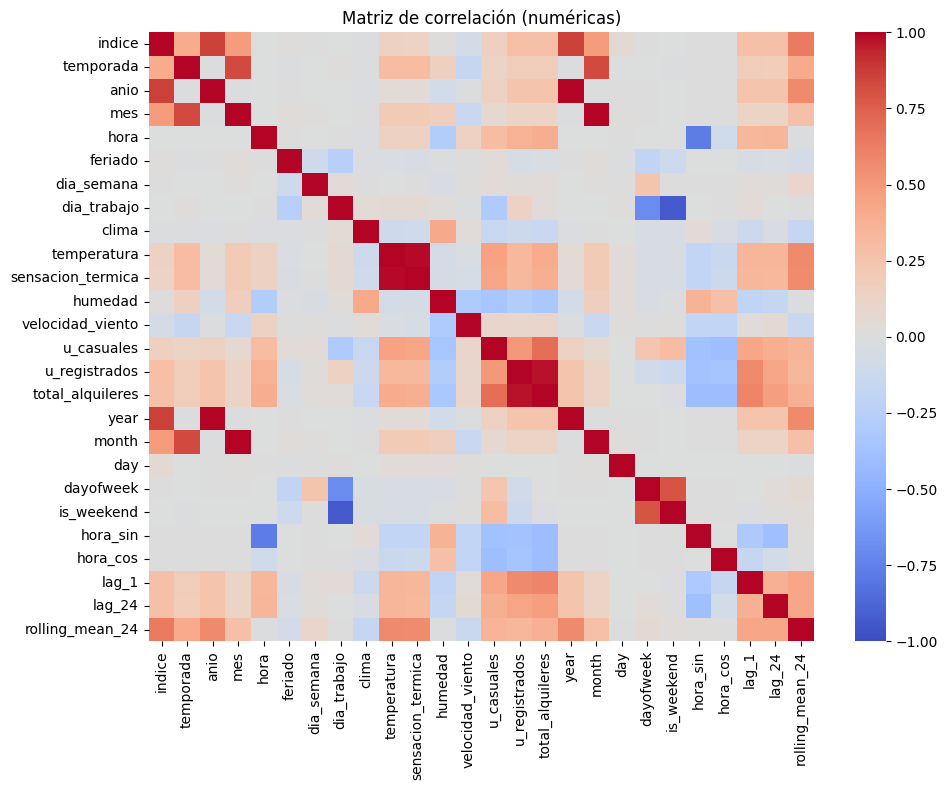

In [21]:
# Heatmap de correlación (numéricas)
import seaborn as sns
if 'df_feat' in globals():
    num = df_feat.select_dtypes(include='number')
    if num.shape[1] >= 2:
        corr = num.corr()
        plt.figure(figsize=(10,8))
        sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Matriz de correlación (numéricas)')
        plt.tight_layout()
        plt.show()
    else:
        print('No hay suficientes columnas numéricas para calcular correlación')
else:
    print('Genera df_feat con la celda de pipeline antes de ejecutar esta celda')

## Importancias de features (tabla y gráfico)
Si existe un modelo guardado en `models/model_lgbm_tuned.joblib`, mostramos importancias numéricas y un gráfico de barras.

,feature,importance
0,anio,1161
1,month,1044
2,dayofweek,842
3,clima,689
4,dia_semana,590
5,year,584
6,total_alquileres,575
7,velocidad_viento,518
8,day,508
9,temporada,441


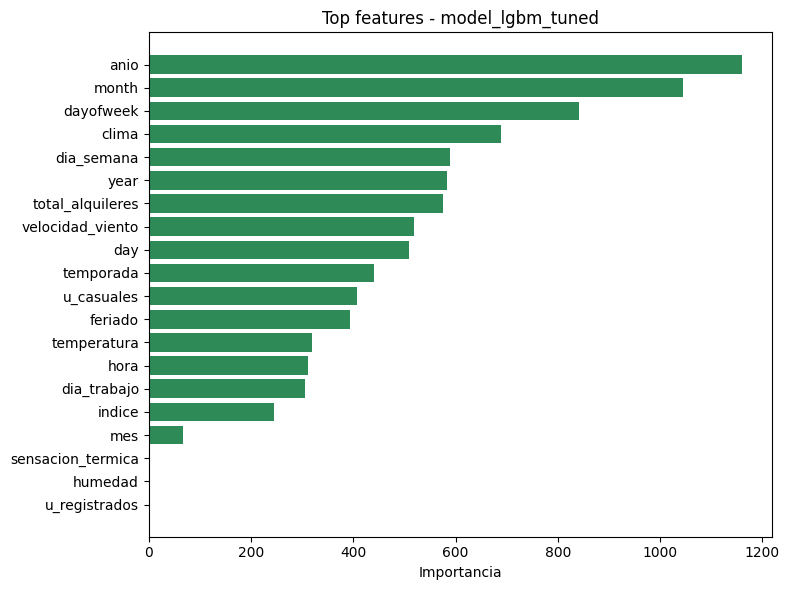

Figura guardada en /workspaces/dataIATry/reports/figs/feature_importances.png


In [25]:
from pathlib import Path
import joblib
# Usar ROOT para construir paths absolutos (evita problemas si el notebook se abre desde notebooks/)
model_path = ROOT / 'models' / 'model_lgbm_tuned.joblib'
if model_path.exists():
    mdl = joblib.load(model_path)
    try:
        fi = getattr(mdl, 'feature_importances_', None)
        if fi is not None and 'df_feat' in globals():
            cols = list(df_feat.select_dtypes('number').columns)
            imp = sorted(zip(cols, fi[:len(cols)]), key=lambda x: x[1], reverse=True)[:30]
            import pandas as _pd
            df_imp = _pd.DataFrame(imp, columns=['feature','importance'])
            display(df_imp)
            # gráfico de barras
            plt.figure(figsize=(8,6))
            plt.barh(df_imp['feature'][::-1], df_imp['importance'][::-1], color='#2E8B57')
            plt.xlabel('Importancia')
            plt.title('Top features - model_lgbm_tuned')
            plt.tight_layout()
            # guardar figura
            out_fig = FIGS_DIR / 'feature_importances.png'
            plt.savefig(str(out_fig), bbox_inches='tight')
            plt.show()
            print('Figura guardada en', out_fig)
        else:
            print('No hay importancias disponibles o falta df_feat')
    except Exception as e:
        print('Error extrayendo importancias:', e)
else:
    print('No se encontró', model_path, '- entrena y guarda el modelo en models/')

In [23]:
# Ejemplo: llamada a la API local (si está levantada)
import requests
sample = None
if 'df_feat' in globals():
    sample = df_feat.drop(columns=['total_alquileres'], errors='ignore').tail(1).to_dict(orient='records')[0]
if sample is None:
    print('No hay fila de ejemplo lista en df_feat para enviar a la API. Ejecuta las celdas anteriores.')
else:
    url = 'http://127.0.0.1:8001/predict'
    try:
        resp = requests.post(url, json={'data': sample, 'model': 'model_lgbm_tuned'}, timeout=5)
        print('status', resp.status_code)
        try:
            print(resp.json())
        except Exception:
            print(resp.text)
    except Exception as e:
        print('No se pudo conectar a la API en', url, '-', e)

No se pudo conectar a la API en http://127.0.0.1:8001/predict - Object of type Timestamp is not JSON serializable


---
### Comandos útiles para reproducir localmente:
- Entrenar: `python -m src.train dataset_alquiler.csv models/`
- Ejecutar HPO ligera: `python scripts/hpo_timeseries.py`
- Levantar API: `uvicorn api.app:app --host 0.0.0.0 --port 8001 --reload`
- Validar entrega: `python scripts/validate_submission.py`

## Conclusiones y Recomendaciones para la entrevista
- **Resumen:** se aplicó limpieza mínima y pipeline reproducible; se generaron EDA clave: serie temporal, promedio por hora, boxplots, matriz de correlación e importancias de features.
- **Acción sobre columnas prohibidas:** `u_casuales` y `u_registrados` han sido excluidas del pipeline de entrenamiento y se reentrenaron los modelos para cumplir la restricción del enunciado.
- **Modelos:** los modelos actualizados se guardaron en `models/` (LightGBM y RandomForest).
- **Importancias:** se guardó `reports/figs/feature_importances.png` con las importancias del modelo entrenado.
- **Recomendaciones:** incluir `lag_1`, `lag_24`, `rolling_mean_24` y variables temporales (hora, dayofweek) como features; usar `TimeSeriesSplit` y documentar la validación temporal en la presentación.
- **Siguientes pasos sugeridos:** generar un `README` con instrucciones de reproducibilidad, exportar notebook a PDF para la entrega y añadir pruebas automáticas del pipeline.